# Beta diversity

## Setup

In [1]:
#Libraries
library("phyloseq")
library("microbiome")
library("IRdisplay")
library("vegan")
library("rbiom")
library("ape")
#Load processed but unrarefied data from main R community workshop
load("/pub14/tea/nsc206/NEOF/R_community/data/phyloseq.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6.1


Attaching package: ‘vegan’


The following object is masked from ‘package:microbiome’:

    diversity



Attaching package: ‘rbiom’


The following object is masked from ‘package:vegan’:

    rarefy


The following objects are masked from ‘package:phyloseq’:

    nsamples, ntaxa, sample.names



Attaching package: ‘ape’


The following objects are masked from ‘package:rbiom’:

    read.tree, write.tree




## Distance matrices
### Unifrac distances

In [2]:
#Calculate weighted unifrac values
unifrac_rbiom_microbiome <- as.matrix(
    rbiom::unifrac(biom = phyloseq::otu_table(pseq), 
                   tree = phyloseq::phy_tree(pseq), 
                   weighted = TRUE))
#Check the first 6 rows and columns of the resulting distance matrix
unifrac_rbiom_microbiome[1:6,1:6]

,LD_CVP_rep1,LD_CVP_rep2,LD_CVP_rep3,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3
LD_CVP_rep1,0.00000000,0.07013157,0.03456180,0.73877860,0.73916662,0.73885803
LD_CVP_rep2,0.07013157,0.00000000,0.04251787,0.72689467,0.72726450,0.72701622
LD_CVP_rep3,0.03456180,0.04251787,0.00000000,0.73416447,0.73455859,0.73426735
LD_ENV_rep1,0.73877860,0.72689467,0.73416447,0.00000000,0.03784400,0.04081576
LD_ENV_rep2,0.73916662,0.72726450,0.73455859,0.03784400,0.00000000,0.02459851
LD_ENV_rep3,0.73885803,0.72701622,0.73426735,0.04081576,0.02459851,0.00000000


### Vegan distances

In [3]:
#Calculate Bray-Curtis distance matrix
bray_curtis_mat <- as.matrix(
    vegan::vegdist(x = t(phyloseq::otu_table(pseq)),
                   method = "bray"))
#Check first 6 rows and columns of matrix
bray_curtis_mat[1:6,1:6]

,LD_CVP_rep1,LD_CVP_rep2,LD_CVP_rep3,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3
LD_CVP_rep1,0.0000000,0.6331186,0.2898973,0.9990490,0.9983080,0.9976924
LD_CVP_rep2,0.6331186,0.0000000,0.5600942,0.9991742,0.9985090,0.9979588
LD_CVP_rep3,0.2898973,0.5600942,0.0000000,0.9976864,0.9973616,0.9991237
LD_ENV_rep1,0.9990490,0.9991742,0.9976864,0.0000000,0.1660712,0.1895658
LD_ENV_rep2,0.9983080,0.9985090,0.9973616,0.1660712,0.0000000,0.1241017
LD_ENV_rep3,0.9976924,0.9979588,0.9991237,0.1895658,0.1241017,0.0000000


## Beta: Iterative rarefaction
### Iterative rarefaction values

In [4]:
#Rarefaction values
#Rarefaction size
#Minimum sample depth in this case
rarefaction_size <- min(microbiome::readcount(pseq))
#Load the vector of 10 rngseeds created in the Iterating rarefaction chapter
load("rngseeds.RData")
#Number of rarefaction iterations to be carried out
#Based on length of rng seed vector
rarefaction_iters <- length(rngseed_vec)

### Iterative beta diversity calculation

In [5]:
#Loop to create iteration based rarefied weighted unifrac values

#Create a matrix to contain the summed wunifrac beta diveristy values
#In this case we'll run the first rarefied beta diversity analysis
pseq_rarefy <- phyloseq::rarefy_even_depth(
    pseq,
    sample.size = rarefaction_size,
    rngseed = rngseed_vec[1],
    verbose = FALSE
)
#wunifrac beta diversity
beta_df_sum <- as.matrix(
    rbiom::unifrac(
        biom = phyloseq::otu_table(pseq_rarefy),
        tree = phyloseq::phy_tree(pseq_rarefy),
        weighted = TRUE
    )
)

#Loop through 2 to the number of rarefaction iterations
for (i in 2:rarefaction_iters){
    #Rarefaction
    pseq_rarefy <- phyloseq::rarefy_even_depth(
        pseq,
        sample.size = rarefaction_size,
        rngseed = rngseed_vec[i],
        verbose = FALSE
    )
    #Beta diversity
    beta_df <- as.matrix(
        rbiom::unifrac(
            biom = phyloseq::otu_table(pseq_rarefy),
            tree = phyloseq::phy_tree(pseq_rarefy),
            weighted = TRUE
        )
    )
    #Add/sum the new data frame values to the sum data frame
    beta_df_sum <-  beta_df_sum + beta_df
}
#Divide by number of rarefaction iterations to get average
beta_df_mean <- beta_df_sum / rarefaction_iters
#Save beta mean dataframe
save(beta_df_mean, file = "wunifrac_df_mean.RData")
#See first 6 rows and columns of matrix
beta_df_mean[1:6,1:6]
#Remove created objects
rm(beta_df_sum, beta_df_mean, pseq_rarefy)

,LD_CVP_rep1,LD_CVP_rep2,LD_CVP_rep3,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3
LD_CVP_rep1,0.0000000,0.07052060,0.03543050,0.73889845,0.73890387,0.73892922
LD_CVP_rep2,0.0705206,0.00000000,0.04229006,0.72668718,0.72667310,0.72675759
LD_CVP_rep3,0.0354305,0.04229006,0.00000000,0.73407414,0.73408435,0.73412754
LD_ENV_rep1,0.7388984,0.72668718,0.73407414,0.00000000,0.04144000,0.04253782
LD_ENV_rep2,0.7389039,0.72667310,0.73408435,0.04144000,0.00000000,0.03083519
LD_ENV_rep3,0.7389292,0.72675759,0.73412754,0.04253782,0.03083519,0.00000000


## Ordination
### Load wunifrac matrix

In [6]:
#Load wunifrac
load("wunifrac_df_mean.RData")

### NMDS

In [7]:
#NMDS ordinate
nmds_res <- vegan::monoMDS(beta_df_mean, k = 2)
#Structure of nmds_res
str(nmds_res)

List of 28
 $ nobj      : int 36
 $ nfix      : int 0
 $ ndim      : int 2
 $ ndis      : int 630
 $ ngrp      : int 1
 $ diss      : num [1:630] 0.00908 0.01068 0.01529 0.01547 0.01557 ...
 $ iidx      : int [1:630] 26 21 14 27 27 12 26 25 27 27 ...
 $ jidx      : int [1:630] 25 20 13 25 26 11 2 2 14 13 ...
 $ xinit     : num [1:72] 0.276 -0.295 -0.819 -0.774 0.547 ...
 $ istart    : int 1
 $ isform    : int 1
 $ ities     : int 1
 $ iregn     : int 1
 $ iscal     : int 1
 $ maxits    : int 200
 $ sratmx    : num 1
 $ strmin    : num 1e-04
 $ sfgrmn    : num 1e-07
 $ dist      : num [1:630] 1.26e-05 1.57e-04 7.43e-05 1.94e-04 2.06e-04 ...
 $ dhat      : num [1:630] 1.26e-05 1.16e-04 1.16e-04 1.42e-04 1.42e-04 ...
 $ points    : num [1:36, 1:2] -0.578 -0.577 -0.577 1.739 1.739 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:36] "LD_CVP_rep1" "LD_CVP_rep2" "LD_CVP_rep3" "LD_ENV_rep1" ...
  .. ..$ : chr [1:2] "MDS1" "MDS2"
  ..- attr(*, "pc")= logi TRUE
 $ stress    : num 0.000

In [8]:
#Extract plot points
nmds_points <- nmds_res$points
#Check head
head(nmds_points)

,MDS1,MDS2
LD_CVP_rep1,-0.5777333,-0.002327723
LD_CVP_rep2,-0.5773583,-0.003328258
LD_CVP_rep3,-0.5774405,-0.002796308
LD_ENV_rep1,1.7392340,0.000898931
LD_ENV_rep2,1.7393065,0.001498048
LD_ENV_rep3,1.7392762,0.001618356


In [9]:
#Create point long data frame with metadata and points
#Extract metadata and ensure row names order matches
metadf <- phyloseq::sample_data(pseq)
if (identical(row.names(metadf), row.names(nmds_points)) == FALSE) {
    metadf <- metadf[row.names(nmds_points),]
}
#Make points with metadata data frame
nmds_points_metadata <- cbind(nmds_points, metadf)
#Check head of data frame
head(nmds_points_metadata)
#Save object we want, remove ones we don't
save(nmds_points_metadata, file = "wunifrac_NMDS.RData")
rm(metadf, nmds_res, nmds_points)

,MDS1,MDS2,sample.name,site,media,replicate,site.media
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,-0.5777333,-0.002327723,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,-0.5773583,-0.003328258,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,-0.5774405,-0.002796308,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_ENV_rep1,1.7392340,0.000898931,LD_ENV_rep1,LD,ENV,rep1,LD_ENV
LD_ENV_rep2,1.7393065,0.001498048,LD_ENV_rep2,LD,ENV,rep2,LD_ENV
LD_ENV_rep3,1.7392762,0.001618356,LD_ENV_rep3,LD,ENV,rep3,LD_ENV


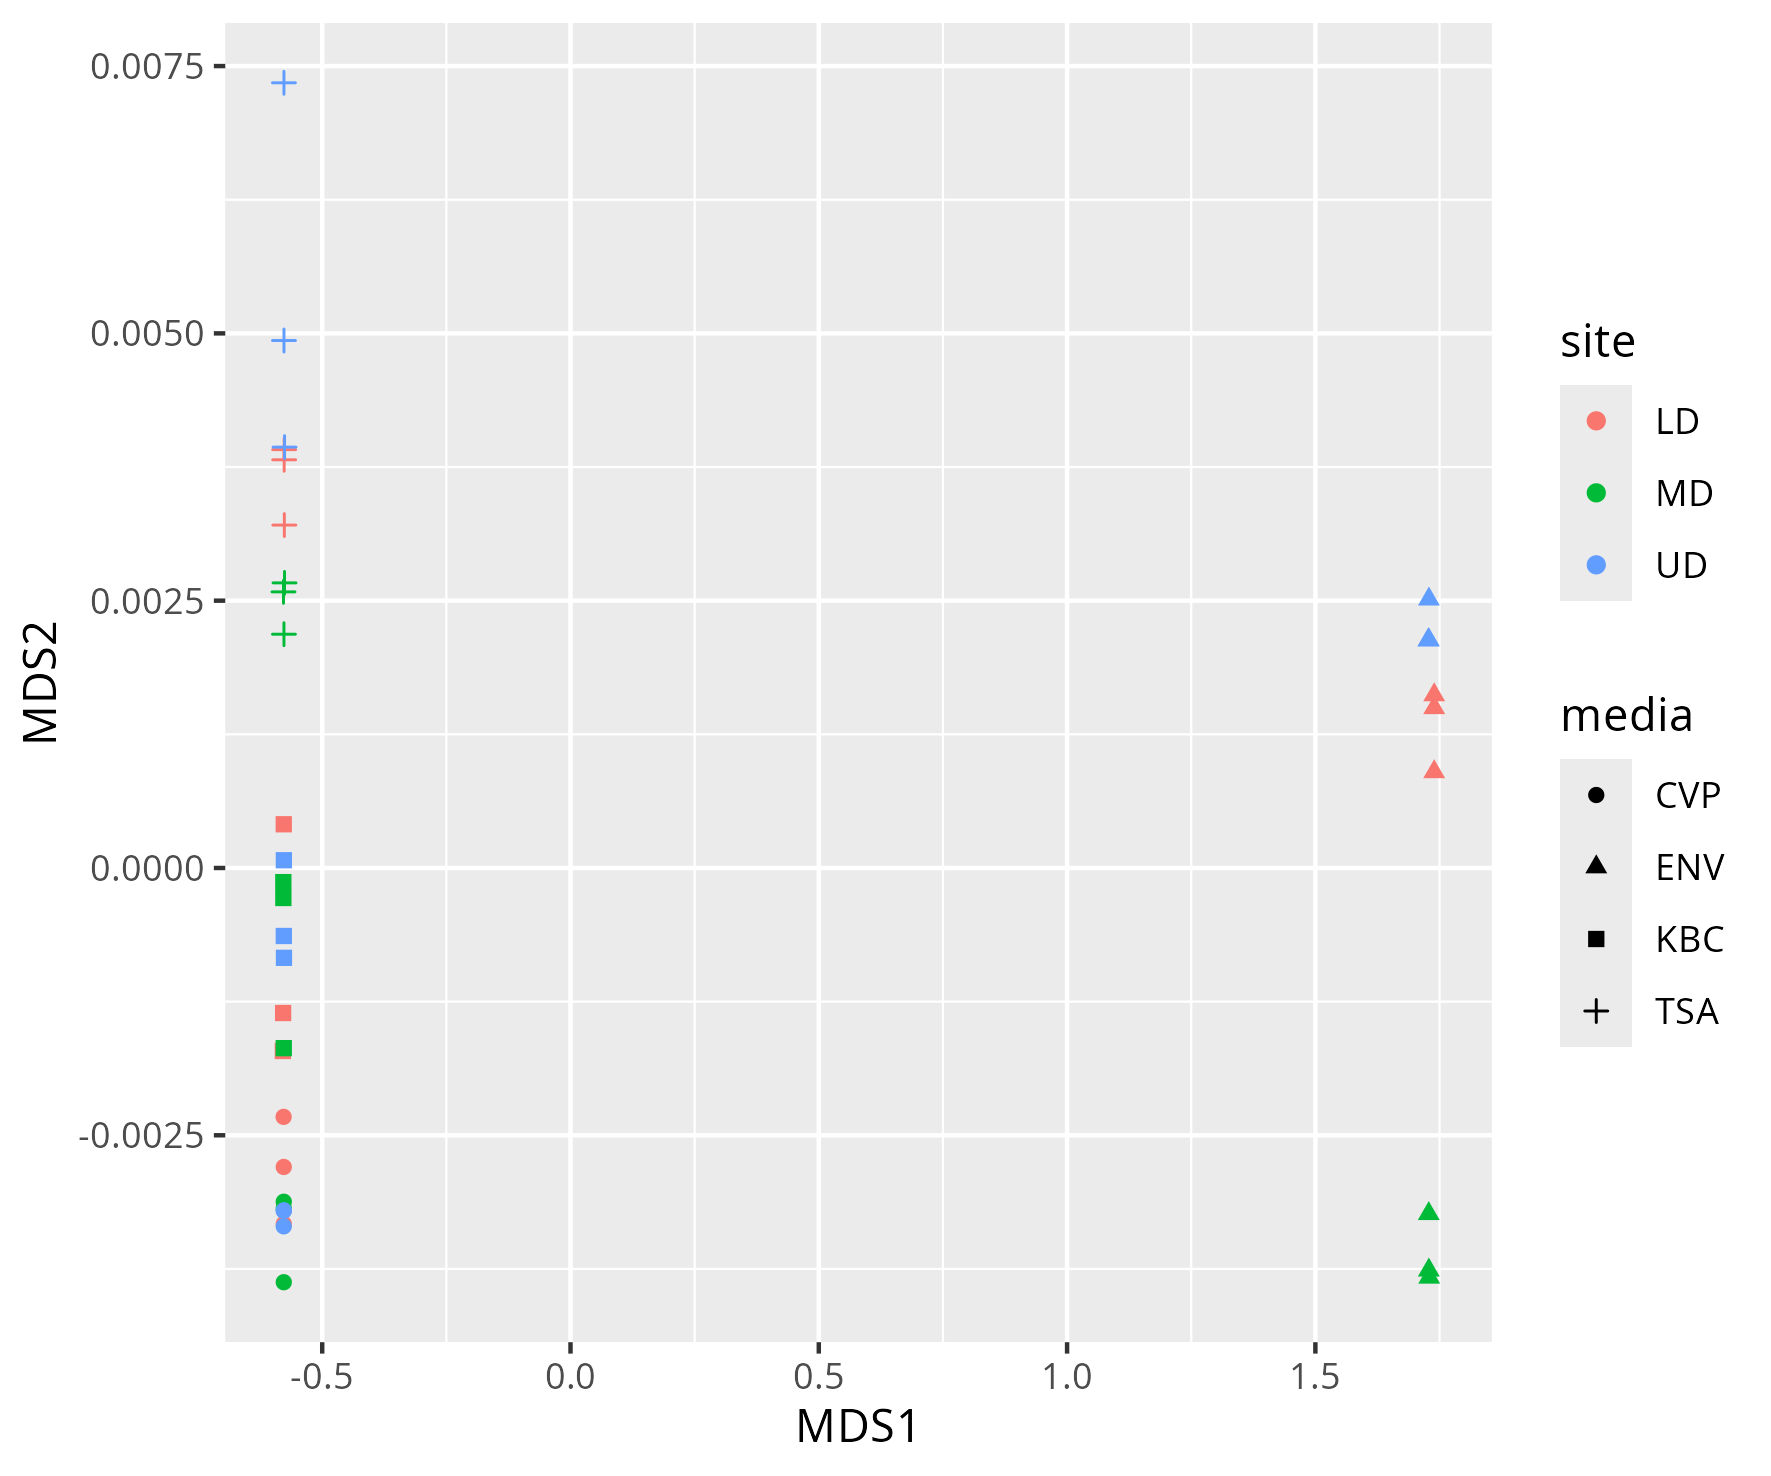

In [10]:
#Produce NMDS scatter plot
#Plot ordination
nmds.wunifrac <- ggplot(data = nmds_points_metadata, 
                        aes(x = MDS1, y = MDS2, color = site, shape = media)) +
                ggplot2::geom_point()
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_NMDS_wunifrac_media_site.png", 
       plot = nmds.wunifrac, 
       device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_NMDS_wunifrac_media_site.png")

### PCoA

In [11]:
#PCoA ordinate
pcoa_res <- ape::pcoa(beta_df_mean)
#Structure of pcoa_res
str(pcoa_res)

List of 5
 $ correction: chr [1:2] "none" "1"
 $ note      : chr "No correction was applied to the negative eigenvalues"
 $ values    :'data.frame':	36 obs. of  6 variables:
  ..$ Eigenvalues   : num [1:36] 2.2755 0.4938 0.2747 0.1191 0.0884 ...
  ..$ Relative_eig  : num [1:36] 0.6746 0.1464 0.0814 0.0353 0.0262 ...
  ..$ Rel_corr_eig  : num [1:36] 0.598 0.1324 0.0752 0.0345 0.0265 ...
  ..$ Broken_stick  : num [1:36] 0.1211 0.0917 0.077 0.0672 0.0598 ...
  ..$ Cum_corr_eig  : num [1:36] 0.598 0.73 0.806 0.84 0.867 ...
  ..$ Cumul_br_stick: num [1:36] 0.121 0.213 0.29 0.357 0.417 ...
 $ vectors   : num [1:36, 1:24] -0.169 -0.147 -0.16 0.533 0.534 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:36] "LD_CVP_rep1" "LD_CVP_rep2" "LD_CVP_rep3" "LD_ENV_rep1" ...
  .. ..$ : chr [1:24] "Axis.1" "Axis.2" "Axis.3" "Axis.4" ...
 $ trace     : num 3.37
 - attr(*, "class")= chr "pcoa"


In [12]:
#Extract 1st 2 axes
pcoa_points <- pcoa_res$vectors[,1:2]
head(pcoa_points)

,Axis.1,Axis.2
LD_CVP_rep1,-0.1694780,-0.10771044
LD_CVP_rep2,-0.1468452,-0.15021477
LD_CVP_rep3,-0.1602265,-0.12863194
LD_ENV_rep1,0.5334991,-0.07243069
LD_ENV_rep2,0.5344849,-0.07699541
LD_ENV_rep3,0.5330033,-0.07570182


In [13]:
#Variation explained values
pcoa_axis_var_explained <- round(x=pcoa_res$values[,"Relative_eig"] * 100, digits = 2)
pcoa_axis_var_explained

[1] 67.46 14.64  8.14  3.53  2.62  1.71  1.03  0.38  0.29  0.24  0.15  0.14
[13]  0.13  0.10  0.08  0.06  0.03  0.02  0.02  0.01  0.01  0.01  0.00  0.00
[25]  0.00  0.00  0.00 -0.01 -0.02 -0.02 -0.03 -0.03 -0.07 -0.10 -0.13 -0.38

In [14]:
#Create point long data frame with metadata
#Extract metadata and ensure row names order matches
metadf <- phyloseq::sample_data(pseq)
if (identical(row.names(metadf), row.names(pcoa_points)) == FALSE) {
    metadf <- metadf[row.names(pcoa_points),]
}
#Make points with metadata
pcoa_points_metadata <- cbind(pcoa_points, metadf)
head(pcoa_points_metadata)
#Save object we want remove ones we don't
save(pcoa_points_metadata, file = "wunifrac_PCoA.RData")
rm(metadf, pcoa_points, pcoa_res)

,Axis.1,Axis.2,sample.name,site,media,replicate,site.media
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,-0.1694780,-0.10771044,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,-0.1468452,-0.15021477,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,-0.1602265,-0.12863194,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_ENV_rep1,0.5334991,-0.07243069,LD_ENV_rep1,LD,ENV,rep1,LD_ENV
LD_ENV_rep2,0.5344849,-0.07699541,LD_ENV_rep2,LD,ENV,rep2,LD_ENV
LD_ENV_rep3,0.5330033,-0.07570182,LD_ENV_rep3,LD,ENV,rep3,LD_ENV


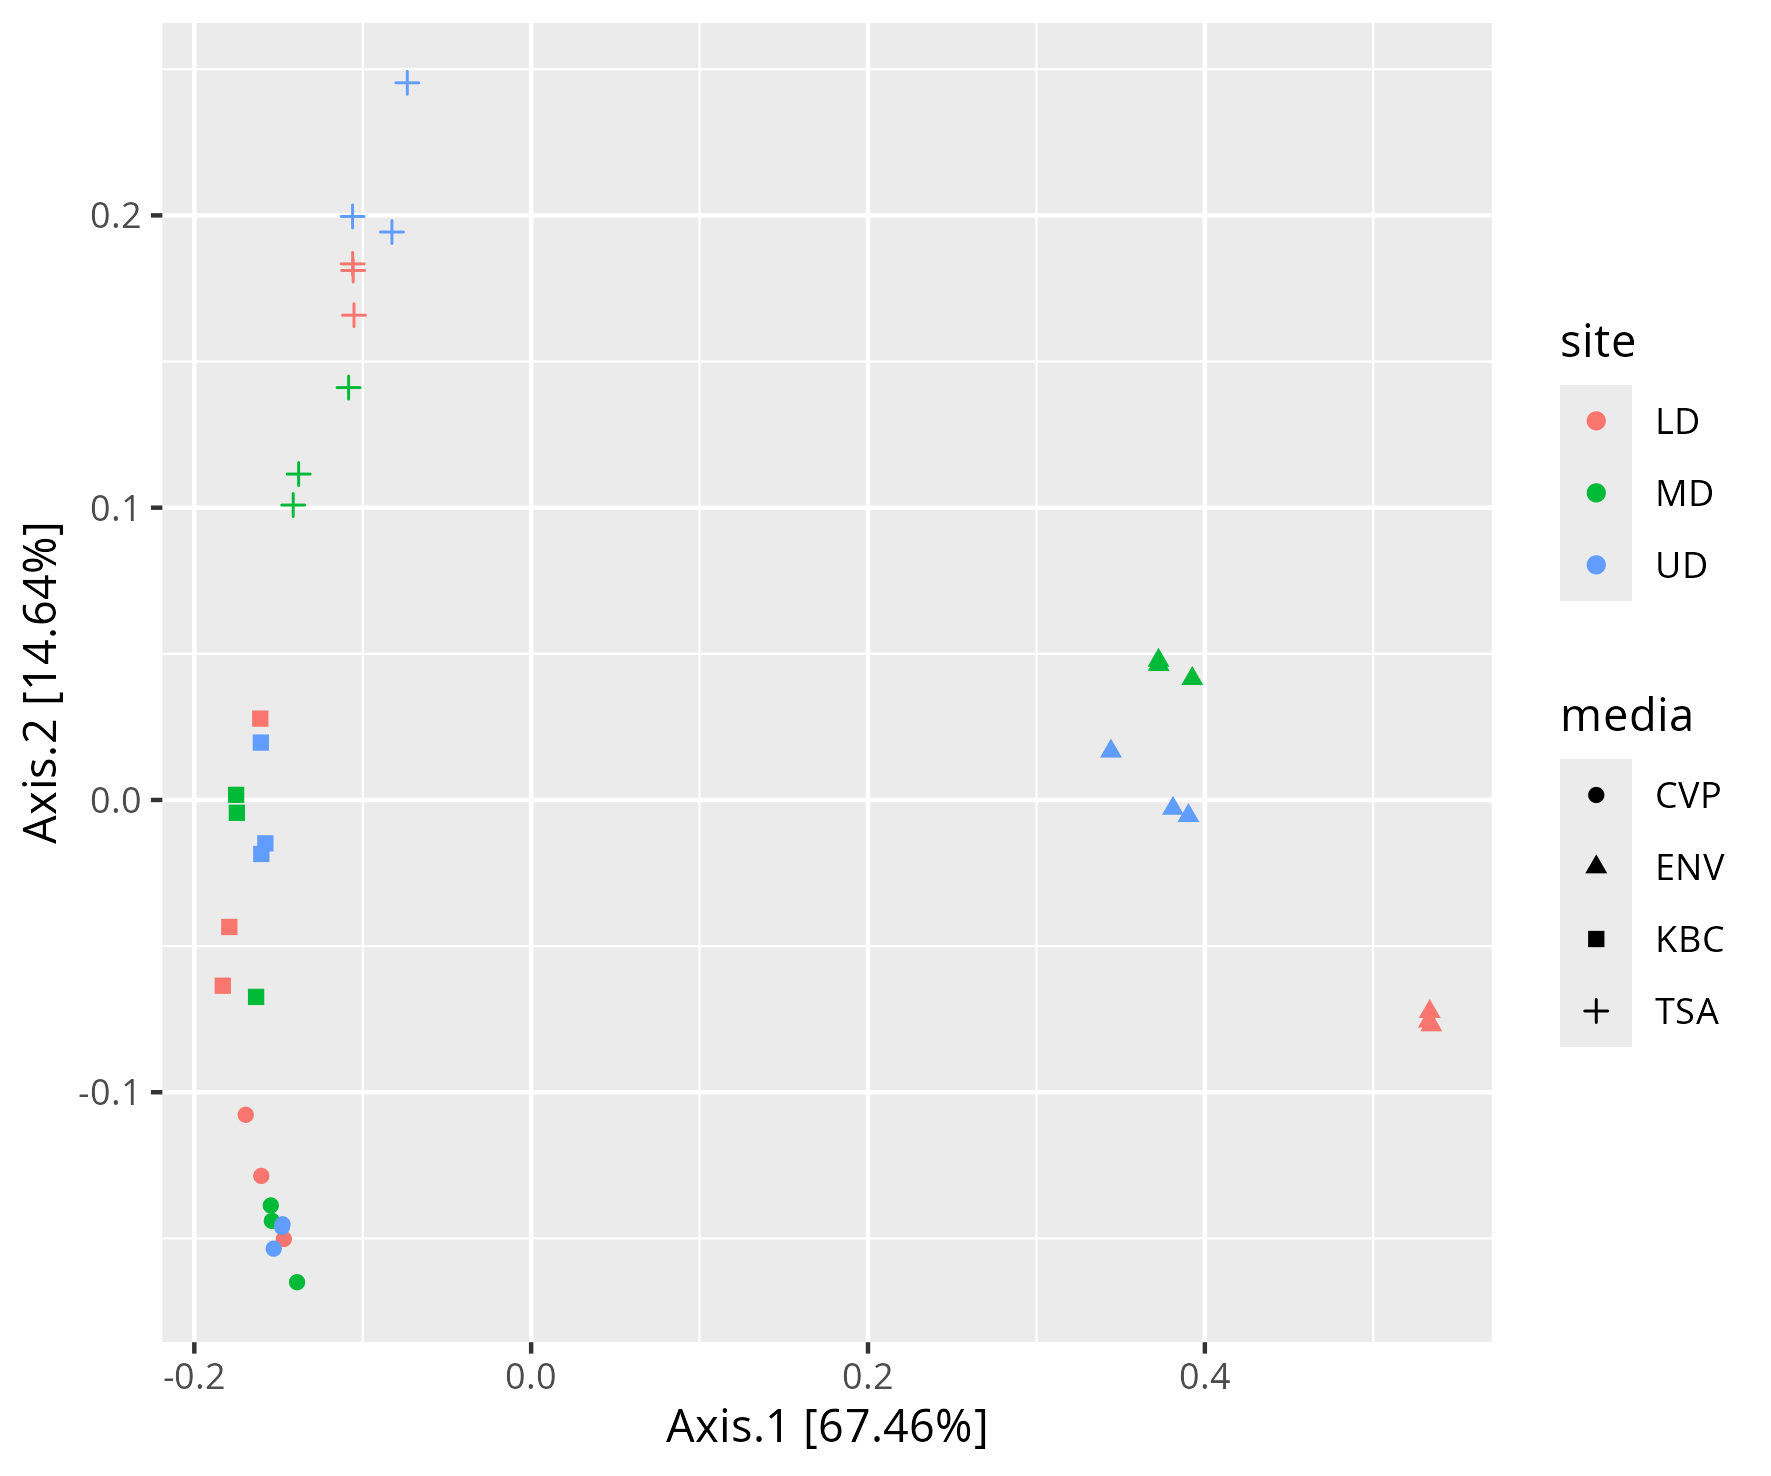

In [15]:
#Produce PCoA scatter plot
#Plot ordination
pcoa.wunifrac <- ggplot(data = pcoa_points_metadata, 
                        aes(x = Axis.1, y = Axis.2, color = site, shape = media)) +
                ggplot2::geom_point() +
                #Add x and y labels to include % variance explained
                labs(x = paste0("Axis.1 [", pcoa_axis_var_explained[1], "%]"),
                     y = paste0("Axis.2 [", pcoa_axis_var_explained[2], "%]"))
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_pcoa_wunifrac_media_site.png", plot = pcoa.wunifrac,
      device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_pcoa_wunifrac_media_site.png")

## Stats

In [16]:
#Load wunifrac
load("wunifrac_df_mean.RData")
#Extract metadata
#need data.frame() for vegan::adonis2() used later
metadf <- data.frame(phyloseq::sample_data(pseq))

In [17]:
#PERMANOVA of media+site
wunifrac_adonis <- vegan::adonis2(beta_df_mean ~ media+site, 
                                  data = metadf, by = "margin")
wunifrac_adonis

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
media,3,2.7060745,0.80230951,52.683193,0.001
site,2,0.1531311,0.04540103,4.471849,0.004
Residual,30,0.5136504,0.15228946,NA,NA
Total,35,3.3728561,1.00000000,NA,NA


In [18]:
#Pairwise PERMANOVA for media
#Get combinations of unique media values
cbn <- combn(x = unique(metadf$media), m = 2)
#Create empty data frame with 4 columns 
# and a number of rows equal to the number of combinations
pairwise_permanova_df <- as.data.frame(matrix(data = NA, nrow = ncol(cbn), ncol = 4))
#Add column names
colnames(pairwise_permanova_df)  <- c("1","2","p","p.adj")

#Loop through combinations
for(i in 1:ncol(cbn)){
    #Subset metadata
    metadf_subset <- metadf[metadf$media %in% cbn[,i],]
    #Extract sample names
    samples_subset <- row.names(metadf_subset)
    #Subset distance matrix
    wunifrac_dist_mat_subset <- beta_df_mean[samples_subset,samples_subset]
    #PERMANOVA/adonis of media
    #Ensure to change group name if using different group (media)
    pairwise_adonis <- vegan::adonis2(
        wunifrac_dist_mat_subset ~ media, data = metadf_subset, by = "margin")
    #Add the group names and p-value to the main data frame
    pairwise_permanova_df[i,1:2] <- cbn[,i]
    pairwise_permanova_df[i,3] <- pairwise_adonis[1,"Pr(>F)"]
}
#Add adjusted P-values
pairwise_permanova_df$p.adj <- p.adjust(pairwise_permanova_df$p, method = "BH")
#View data frame
pairwise_permanova_df
#Write to file
write.table(x = pairwise_permanova_df, file = "pairwise_permanova_media_wunifrac.tsv", 
            quote = FALSE, row.names =FALSE)

1,2,p,p.adj
<chr>,<chr>,<dbl>,<dbl>
CVP,ENV,0.001,0.0012
CVP,KBC,0.002,0.0020
CVP,TSA,0.001,0.0012
ENV,KBC,0.001,0.0012
ENV,TSA,0.001,0.0012
KBC,TSA,0.001,0.0012


## Subsetting for ordination

In [19]:
#Load wunifrac
load("wunifrac_df_mean.RData")
#Load metadata
metadf <- phyloseq::sample_data(pseq)
#Subset dataframe so it excludes env samples
metadf_noenv <- metadf[metadf$media != "ENV",]
#Subset distance matrix so it only contains non env samples
beta_df_mean_noenv <- beta_df_mean[row.names(metadf_noenv),row.names(metadf_noenv)]
beta_df_mean_noenv

,LD_CVP_rep1,LD_CVP_rep2,LD_CVP_rep3,LD_KBC_rep1,LD_KBC_rep2,LD_KBC_rep3,LD_TSA_rep1,LD_TSA_rep2,LD_TSA_rep3,MD_CVP_rep1,⋯,MD_TSA_rep3,UD_CVP_rep1,UD_CVP_rep2,UD_CVP_rep3,UD_KBC_rep1,UD_KBC_rep2,UD_KBC_rep3,UD_TSA_rep1,UD_TSA_rep2,UD_TSA_rep3
LD_CVP_rep1,0.00000000,0.07052060,0.03543050,0.13723872,0.13056583,0.16424377,0.28940857,0.30091219,0.30351444,0.06691097,⋯,0.27668563,0.065859501,0.064858025,0.06974053,0.13177913,0.1267405,0.14459971,0.31423822,0.4211195,0.34153962
LD_CVP_rep2,0.07052060,0.00000000,0.04229006,0.18731388,0.18358460,0.21886292,0.34231388,0.35443328,0.35725851,0.02790926,⋯,0.32372925,0.022163153,0.020870174,0.02524557,0.16511796,0.1782274,0.19225007,0.35942183,0.4254732,0.36135476
LD_CVP_rep3,0.03543050,0.04229006,0.00000000,0.16628011,0.15770627,0.19478890,0.31928356,0.33040568,0.33345252,0.04018402,⋯,0.30109230,0.039231652,0.037964558,0.04128925,0.14104564,0.1534278,0.16760538,0.33511326,0.4203888,0.34330860
LD_KBC_rep1,0.13723872,0.18731388,0.16628011,0.00000000,0.03633346,0.15475187,0.24545141,0.26493986,0.26700686,0.18101762,⋯,0.27781261,0.183098794,0.183117288,0.18336934,0.18146665,0.1304873,0.18426472,0.32394481,0.4340609,0.35684073
LD_KBC_rep2,0.13056583,0.18358460,0.15770627,0.03633346,0.00000000,0.13360835,0.22386073,0.24272021,0.24513593,0.17843437,⋯,0.25652560,0.177978663,0.177639348,0.18304843,0.15190148,0.1144737,0.16026023,0.30010612,0.4088390,0.33222883
LD_KBC_rep3,0.16424377,0.21886292,0.19478890,0.15475187,0.13360835,0.00000000,0.15455254,0.16582520,0.16912378,0.21282628,⋯,0.18825685,0.212361892,0.212018397,0.21365448,0.11469373,0.1611327,0.08470539,0.21188040,0.3281036,0.24461432
LD_TSA_rep1,0.28940857,0.34231388,0.31928356,0.24545141,0.22386073,0.15455254,0.00000000,0.04084149,0.04425832,0.33704852,⋯,0.15352184,0.338936490,0.337703112,0.34570821,0.21834791,0.2213658,0.18833517,0.11309988,0.2393606,0.16759591
LD_TSA_rep2,0.30091219,0.35443328,0.33040568,0.26493986,0.24272021,0.16582520,0.04084149,0.00000000,0.01774028,0.34883554,⋯,0.17254575,0.350381448,0.349558491,0.35691820,0.22919622,0.2398769,0.19804518,0.11054024,0.2113743,0.14287102
LD_TSA_rep3,0.30351444,0.35725851,0.33345252,0.26700686,0.24513593,0.16912378,0.04425832,0.01774028,0.00000000,0.35166745,⋯,0.17833581,0.353151789,0.352287059,0.35982519,0.23282637,0.2445881,0.20223775,0.11316686,0.2108666,0.14198351
MD_CVP_rep1,0.06691097,0.02790926,0.04018402,0.18101762,0.17843437,0.21282628,0.33704852,0.34883554,0.35166745,0.00000000,⋯,0.31226646,0.024966377,0.025386221,0.02260617,0.16285610,0.1744183,0.18647108,0.35219103,0.4274871,0.35390728


In [20]:
#Ordinate subset distance matrix with PCoA in this case
#PCoA ordinate
pcoa_res <- ape::pcoa(beta_df_mean_noenv)
#Variation explained values
pcoa_axis_var_explained <- round(pcoa_res$values[,"Relative_eig"] * 100, digits = 2)
pcoa_axis_var_explained
#Extract 1st 2 axes
pcoa_points <- pcoa_res$vectors[,1:2]
head(pcoa_points)

[1] 70.41 13.29  8.63  5.17  1.76  1.33  0.73  0.68  0.46  0.21  0.15  0.12
[13]  0.05  0.03  0.02  0.01  0.00  0.00 -0.01 -0.03 -0.08 -0.10 -0.14 -0.31
[25] -0.42 -0.47 -1.49

,Axis.1,Axis.2
LD_CVP_rep1,-0.11476185,-0.02372458
LD_CVP_rep2,-0.15498172,0.03938026
LD_CVP_rep3,-0.13504523,0.01650583
LD_KBC_rep1,-0.07108218,-0.12831041
LD_KBC_rep2,-0.05209534,-0.11230378
LD_KBC_rep3,0.02585896,-0.04918364


In [21]:
#Create point long data frame with metadata
#Ensure row names order matches
if (identical(row.names(metadf_noenv), row.names(pcoa_points)) == FALSE) {
    metadf_noenv <- metadf_noenv[row.names(pcoa_points),]
}
#Make points with metadata
pcoa_points_metadata <- cbind(pcoa_points, metadf_noenv)
head(pcoa_points_metadata)
#Save object we want remove ones we don't
save(pcoa_points_metadata, file = "noenv_wunifrac_PCoA.RData")
rm(metadf, pcoa_points, pcoa_res)

,Axis.1,Axis.2,sample.name,site,media,replicate,site.media
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,-0.11476185,-0.02372458,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,-0.15498172,0.03938026,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,-0.13504523,0.01650583,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_KBC_rep1,-0.07108218,-0.12831041,LD_KBC_rep1,LD,KBC,rep1,LD_KBC
LD_KBC_rep2,-0.05209534,-0.11230378,LD_KBC_rep2,LD,KBC,rep2,LD_KBC
LD_KBC_rep3,0.02585896,-0.04918364,LD_KBC_rep3,LD,KBC,rep3,LD_KBC


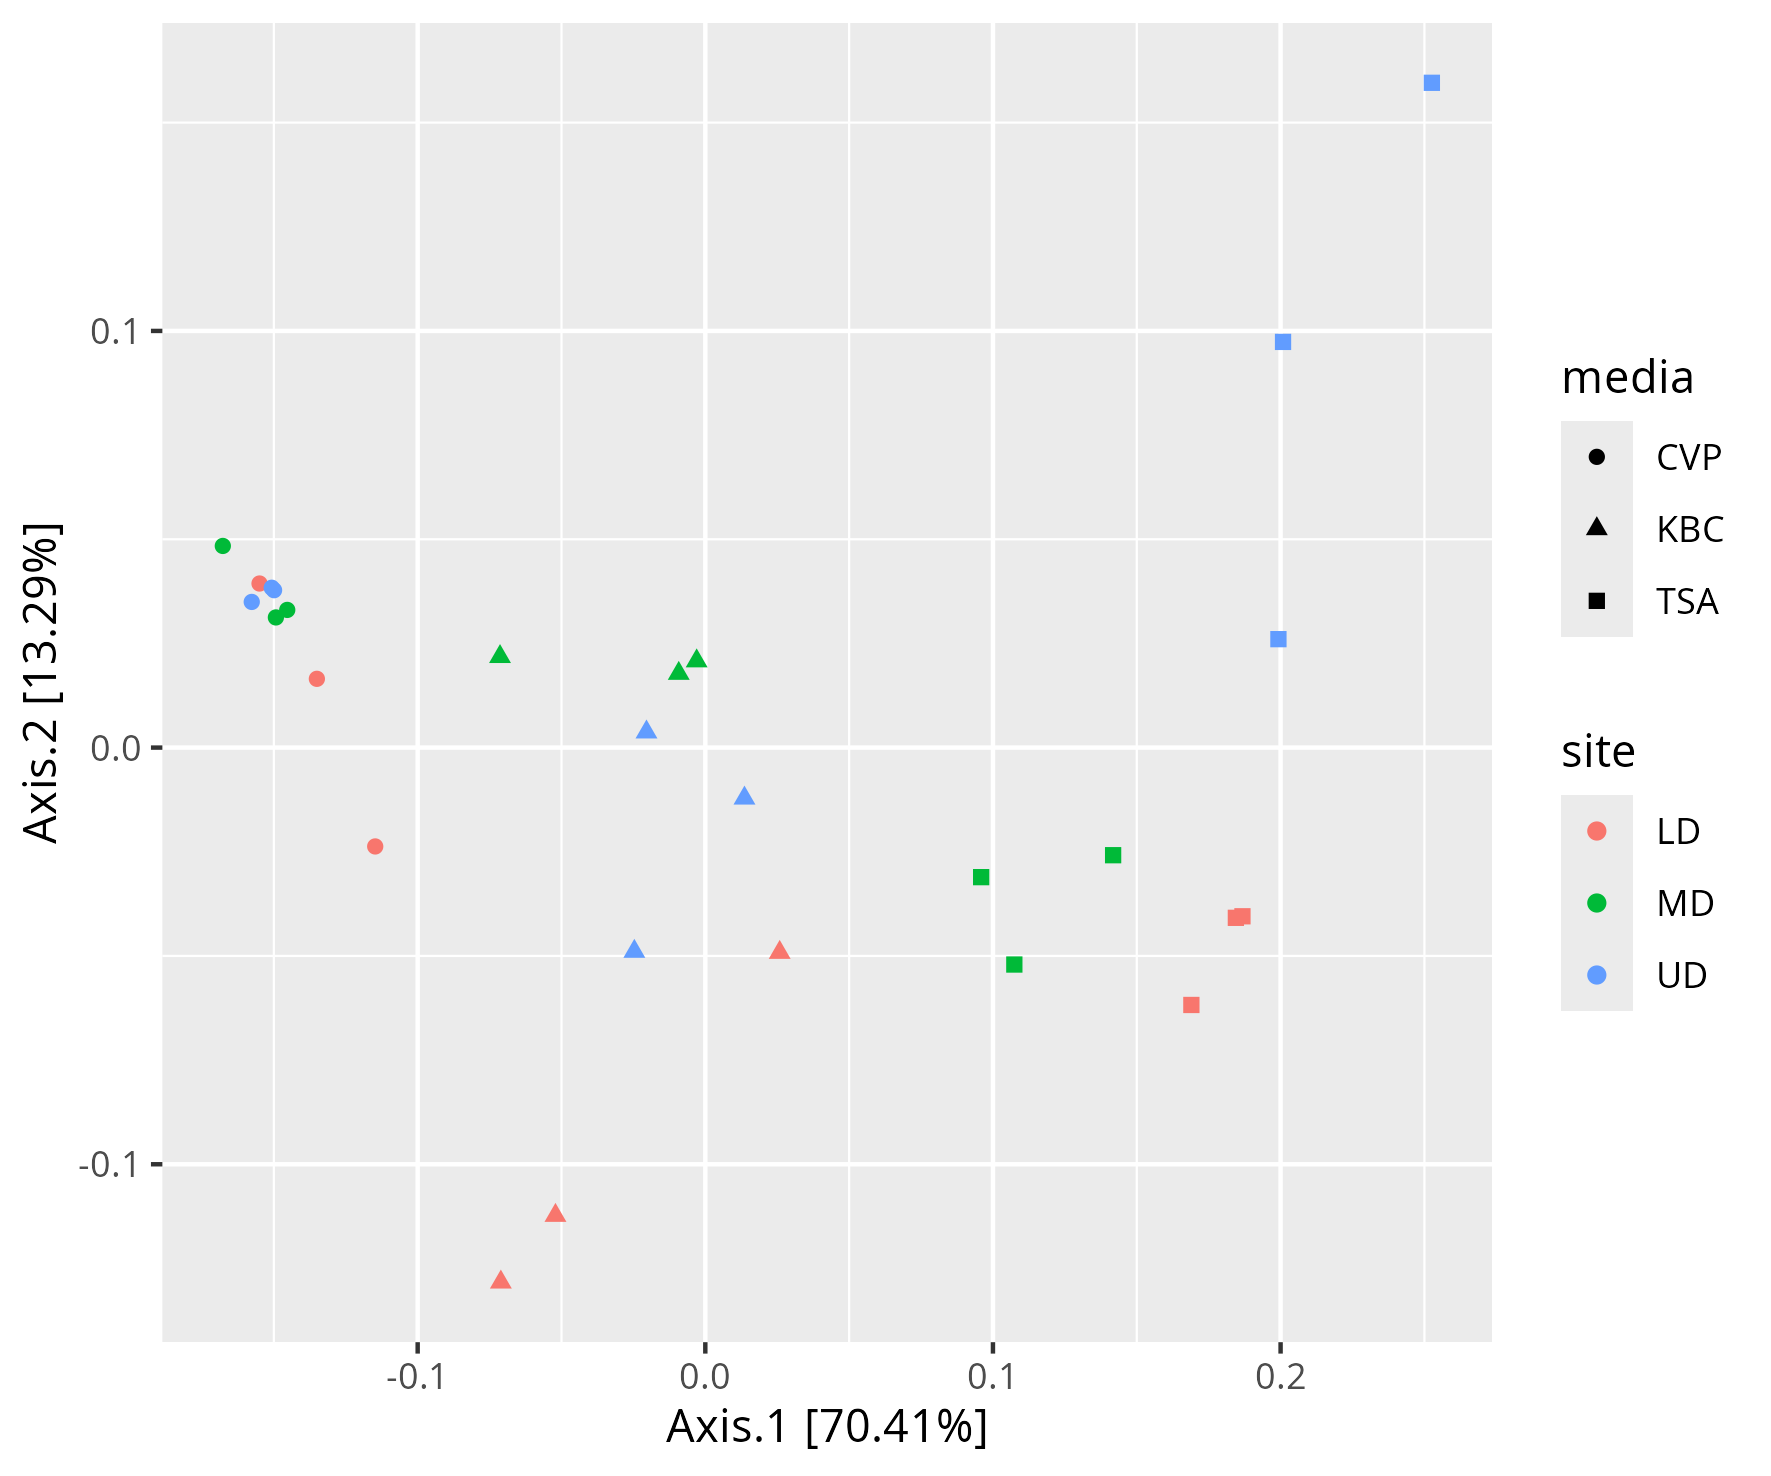

In [22]:
#Produce PCoA scatter plot
#Plot ordination
pcoa.wunifrac <- ggplot(data = pcoa_points_metadata, 
                        aes(x = Axis.1, y = Axis.2, color = site, shape = media)) +
                ggplot2::geom_point() +
                labs(x = paste0("Axis.1 [", pcoa_axis_var_explained[1], "%]"),
                     y = paste0("Axis.2 [", pcoa_axis_var_explained[2], "%]"))
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_pcoa_wunifrac_noenv_media_site.png", 
       plot = pcoa.wunifrac,
       device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_pcoa_wunifrac_noenv_media_site.png")

## Challenge: Bray-curtis plots

In [23]:
#Rarefaction values
#Rarefaction size
#Minimum sample depth in this case
rarefaction_size <- min(microbiome::readcount(pseq))
#Load the vector of 10 rngseeds created in the Iterating rarefaction chapter
load("rngseeds.RData")
#Number of rarefaction iterations to be carried out
#Based on length of rng seed vector
rarefaction_iters <- length(rngseed_vec)

In [24]:
#Calculate rarefied bray-curtis through iterations
#We can use a loop to carry this out for us

#First create a matrix to contain the final summed bray-curtis beta diversity values
#In this case we'll run the first rarefied beta diversity analysis
pseq_rarefy <- phyloseq::rarefy_even_depth(
    pseq,
    sample.size = rarefaction_size,
    rngseed = rngseed_vec[1],
    verbose = FALSE)
#bray-curtis beta diversity
beta_df_sum <- as.matrix(
    vegan::vegdist(x = t(phyloseq::otu_table(pseq_rarefy)), 
                   method = "bray"))
#Loop through 2 to the number of rarefaction iterations
for (i in 2:rarefaction_iters){
    #Rarefaction
    pseq_rarefy <- phyloseq::rarefy_even_depth(
        pseq,
        sample.size = rarefaction_size,
        rngseed = rngseed_vec[i],
        verbose = FALSE)
    #beta diversity
    beta_df <- as.matrix(
        vegan::vegdist(x = t(phyloseq::otu_table(pseq_rarefy)), 
                       method = "bray"))
    #Add/sum the new data frame values to the sum data frame
    beta_df_sum <-  beta_df_sum + beta_df
}
#Divide by number of rarefaction iterations to get average
beta_df_mean <- beta_df_sum / rarefaction_iters
#Save bray curtis mean dataframe
save(beta_df_mean, file = "braycurtis_df_mean.RData")
#See head of data frame
beta_df_mean[1:6,1:6]
#Remove created objects
rm(beta_df_sum, beta_df_mean, pseq_rarefy)

,LD_CVP_rep1,LD_CVP_rep2,LD_CVP_rep3,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3
LD_CVP_rep1,0.0000000,0.6162082,0.2450781,0.9990798,0.9984568,0.9980159
LD_CVP_rep2,0.6162082,0.0000000,0.5559379,0.9990798,0.9984089,0.9980159
LD_CVP_rep3,0.2450781,0.5559379,0.0000000,0.9974696,0.9971437,0.9991374
LD_ENV_rep1,0.9990798,0.9990798,0.9974696,0.0000000,0.1298668,0.1332503
LD_ENV_rep2,0.9984568,0.9984089,0.9971437,0.1298668,0.0000000,0.1319850
LD_ENV_rep3,0.9980159,0.9980159,0.9991374,0.1332503,0.1319850,0.0000000


In [25]:
#Load bray-curtis
load("braycurtis_df_mean.RData")

In [26]:
#NMDS ordinate
nmds_res <- vegan::metaMDS(beta_df_mean, k = 2)
#Plot points
nmds_res$points

Run 0 stress 0.07696299 
Run 1 stress 0.07935547 
Run 2 stress 0.07414471 
... New best solution
... Procrustes: rmse 0.05373447  max resid 0.2213805 
Run 3 stress 0.07714992 
Run 4 stress 0.07914991 
Run 5 stress 0.07414396 
... New best solution
... Procrustes: rmse 0.0002483133  max resid 0.001034338 
... Similar to previous best
Run 6 stress 0.2338757 
Run 7 stress 0.07708778 
Run 8 stress 0.07414362 
... New best solution
... Procrustes: rmse 0.001190949  max resid 0.004591528 
... Similar to previous best
Run 9 stress 0.07696275 
Run 10 stress 0.07425345 
... Procrustes: rmse 0.003412033  max resid 0.01585528 
Run 11 stress 0.0741436 
... New best solution
... Procrustes: rmse 1.464081e-05  max resid 4.180527e-05 
... Similar to previous best
Run 12 stress 0.07708765 
Run 13 stress 0.07414338 
... New best solution
... Procrustes: rmse 5.959157e-05  max resid 0.000166263 
... Similar to previous best
Run 14 stress 0.07414355 
... Procrustes: rmse 0.0009852  max resid 0.00371025 


,MDS1,MDS2
LD_CVP_rep1,-0.20111704,-0.07728020
LD_CVP_rep2,-0.20997163,-0.18227544
LD_CVP_rep3,-0.21414845,-0.11174341
LD_ENV_rep1,0.70101595,-0.08899828
LD_ENV_rep2,0.68420699,-0.10258731
LD_ENV_rep3,0.71185484,-0.08226878
LD_KBC_rep1,-0.20377656,0.04965566
LD_KBC_rep2,-0.18711514,0.06806587
LD_KBC_rep3,-0.22985683,0.03297069
LD_TSA_rep1,-0.10081786,0.07817089


In [27]:
#Create long data frame with metadata and points
#Extract metadata and ensure row names order matches
metadf <- phyloseq::sample_data(pseq)
if (identical(row.names(metadf), row.names(nmds_res$points)) == FALSE) {
    metadf <- metadf[row.names(nmds_res$points),]
}
#Make points with metadata
nmds_points_metadata <- cbind(nmds_res$points, metadf)
#Check head of data frame
head(nmds_points_metadata)
#Save object we want remove ones we don't
save(nmds_points_metadata, file = "bray_NMDS.RData")
rm(metadf, nmds_res)

,MDS1,MDS2,sample.name,site,media,replicate,site.media
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,-0.2011170,-0.07728020,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,-0.2099716,-0.18227544,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,-0.2141485,-0.11174341,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_ENV_rep1,0.7010159,-0.08899828,LD_ENV_rep1,LD,ENV,rep1,LD_ENV
LD_ENV_rep2,0.6842070,-0.10258731,LD_ENV_rep2,LD,ENV,rep2,LD_ENV
LD_ENV_rep3,0.7118548,-0.08226878,LD_ENV_rep3,LD,ENV,rep3,LD_ENV


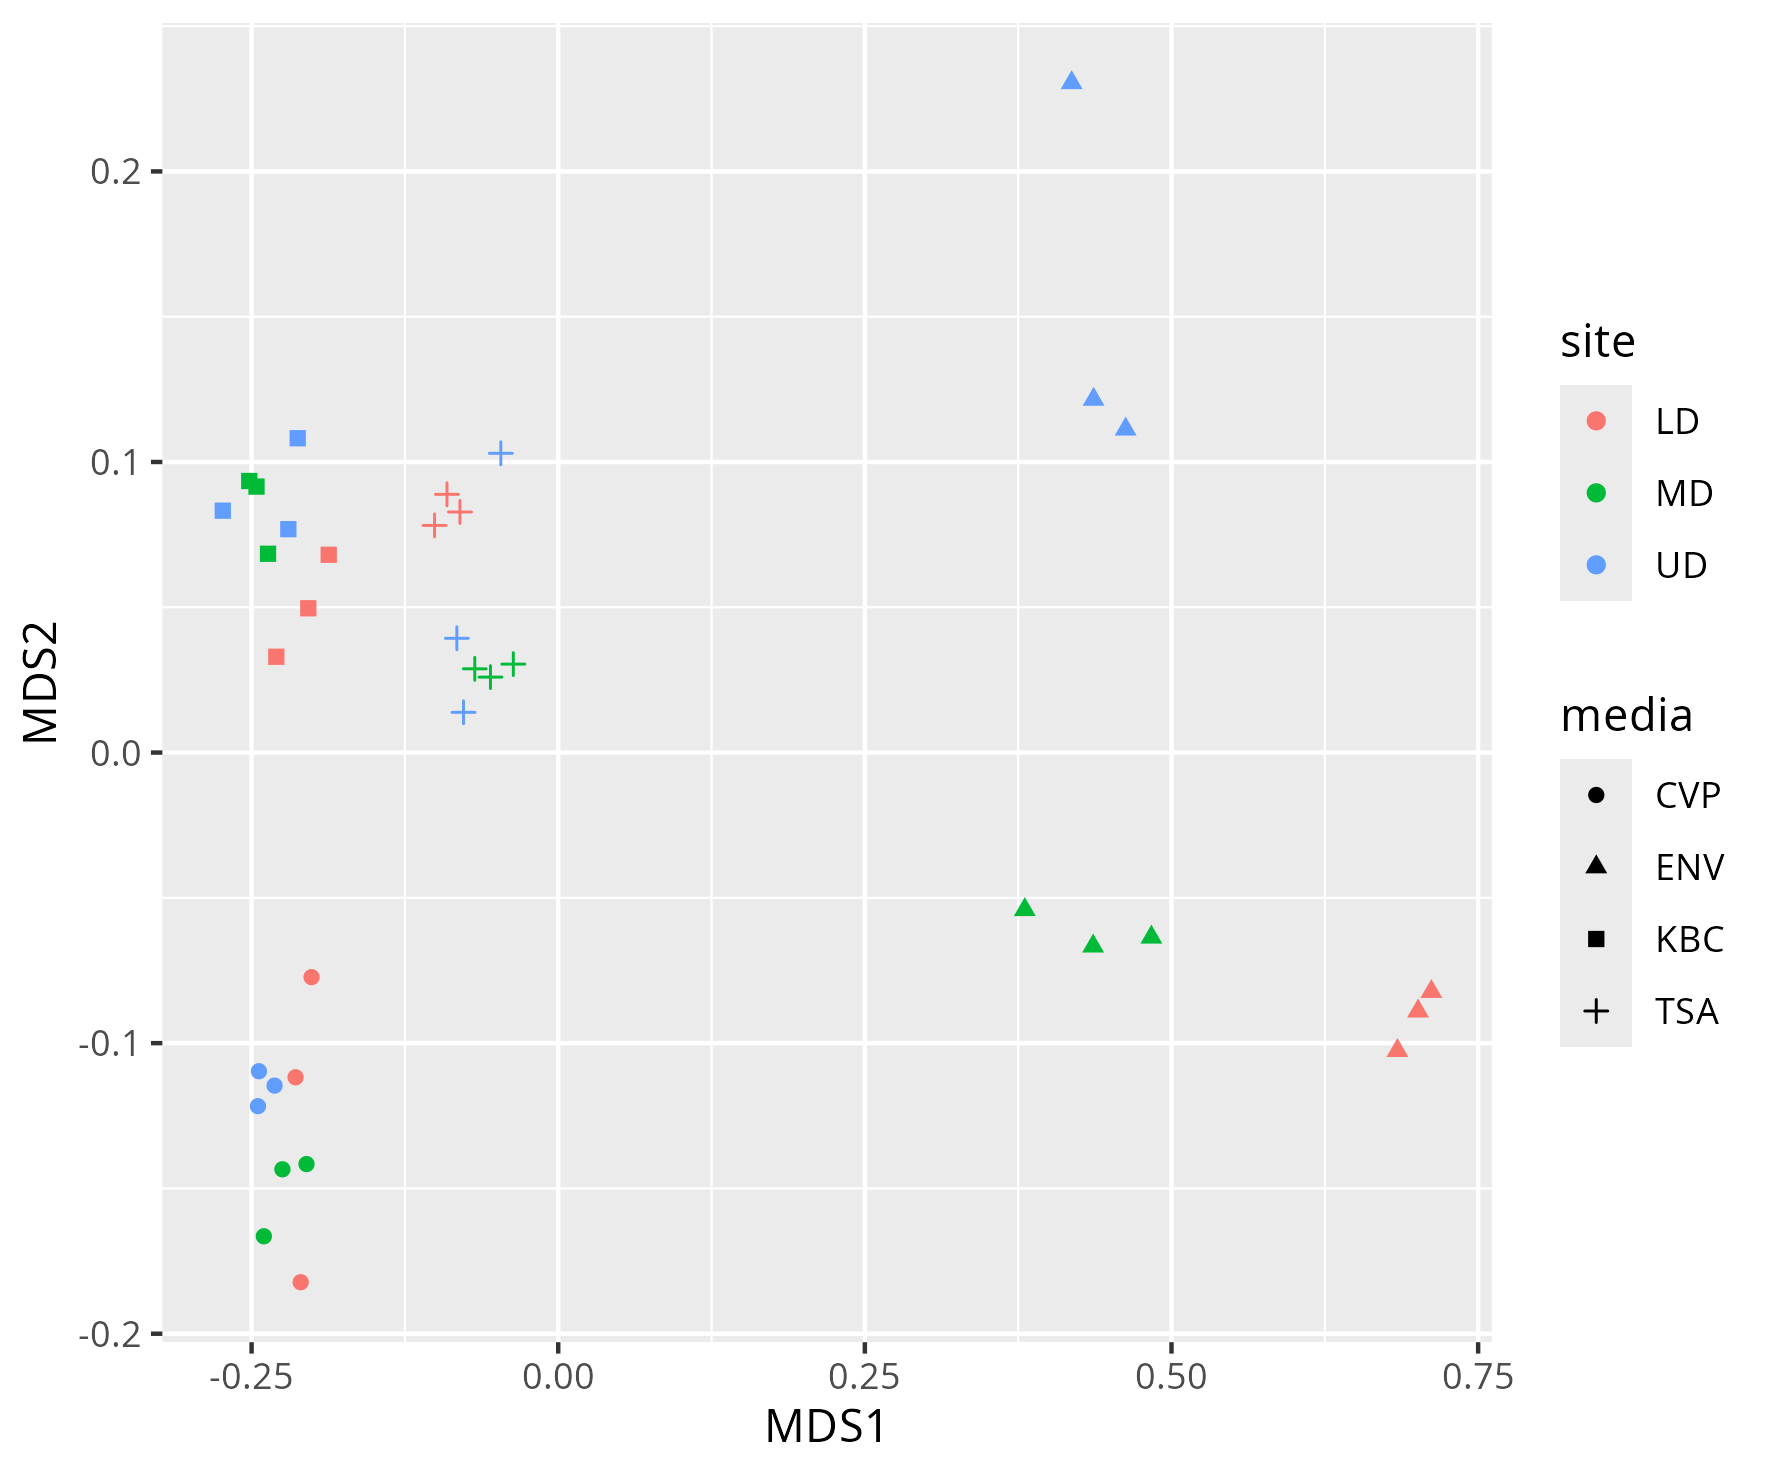

In [28]:
#Produce NMDS scatter plot
#Plot ordination
nmds.bray <- ggplot(data = nmds_points_metadata, 
                    aes(x = MDS1, y = MDS2, color = site, shape = media)) +
                ggplot2::geom_point()
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_NMDS_bray_media_site.png", 
       plot = nmds.bray,
       device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_NMDS_bray_media_site.png")

In [29]:
#PCoA ordinate
pcoa_res <- ape::pcoa(beta_df_mean)
#Extract 1st 2 axes
pcoa_points <- pcoa_res$vectors[,1:2]
head(pcoa_points)
#Variation explained values
pcoa_axis_var_explained <- round(pcoa_res$values[,"Relative_eig"] * 100, digits = 2)
pcoa_axis_var_explained

,Axis.1,Axis.2
LD_CVP_rep1,0.16442774,-0.243029541
LD_CVP_rep2,0.06268091,-0.408694532
LD_CVP_rep3,0.12685031,-0.355113508
LD_ENV_rep1,-0.55132750,0.002818246
LD_ENV_rep2,-0.54268873,0.001225455
LD_ENV_rep3,-0.54382814,0.002427327


[1] 21.98 18.96 12.90  8.77  6.41  5.14  3.88  3.06  2.40  2.12  1.91  1.76
[13]  1.55  1.51  1.20  0.92  0.82  0.78  0.64  0.58  0.48  0.40  0.34  0.28
[25]  0.23  0.20  0.17  0.14  0.11  0.09  0.08  0.06  0.06  0.05  0.01

In [30]:
#Create point long data frame with metadata
#Extract metadata and ensure row names order matches
metadf <- phyloseq::sample_data(pseq)
if (identical(row.names(metadf), row.names(pcoa_points)) == FALSE) {
    metadf <- metadf[row.names(pcoa_points),]
}
#Make points with metadata
pcoa_points_metadata <- cbind(pcoa_points, metadf)
head(pcoa_points_metadata)
#Save object we want remove ones we don't
save(pcoa_points_metadata, file = "bray_PCoA.RData")
rm(metadf, pcoa_points, pcoa_res)

,Axis.1,Axis.2,sample.name,site,media,replicate,site.media
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,0.16442774,-0.243029541,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,0.06268091,-0.408694532,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,0.12685031,-0.355113508,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_ENV_rep1,-0.55132750,0.002818246,LD_ENV_rep1,LD,ENV,rep1,LD_ENV
LD_ENV_rep2,-0.54268873,0.001225455,LD_ENV_rep2,LD,ENV,rep2,LD_ENV
LD_ENV_rep3,-0.54382814,0.002427327,LD_ENV_rep3,LD,ENV,rep3,LD_ENV


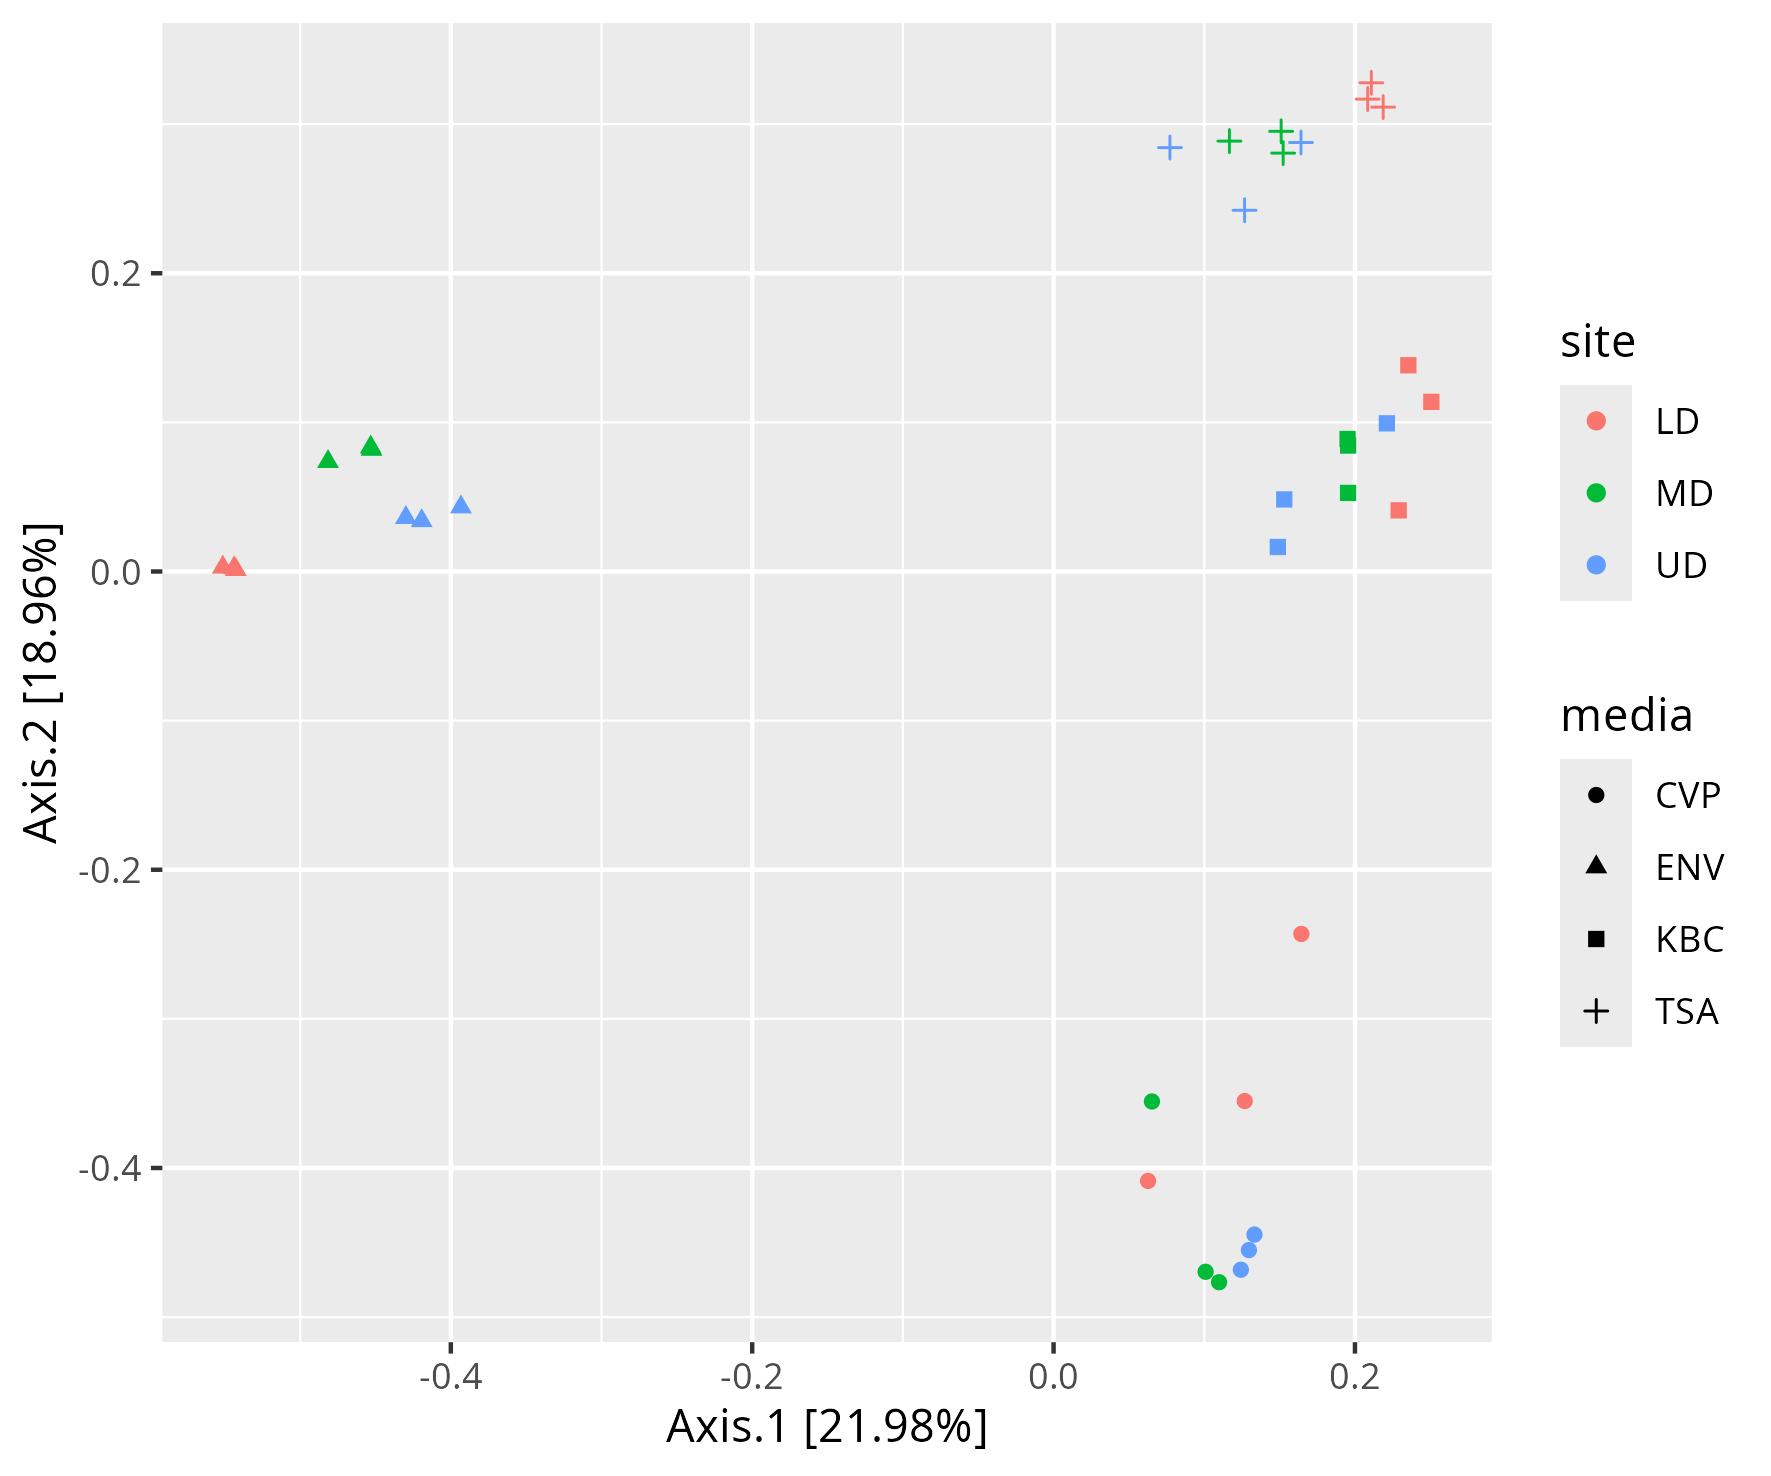

In [31]:
#Produce PCoA scatter plot
#Plot ordination
pcoa.bray <- ggplot(data = pcoa_points_metadata, 
                    aes(x = Axis.1, y = Axis.2, color = site, shape = media)) +
                ggplot2::geom_point() +
                labs(x = paste0("Axis.1 [", pcoa_axis_var_explained[1], "%]"),
                     y = paste0("Axis.2 [", pcoa_axis_var_explained[2], "%]"))
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_pcoa_bray_media_site.png", plot = pcoa.bray,
      device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_pcoa_bray_media_site.png")